## 효율적 투자선 , 샤프지수
* 수익(return), 위험(risk)  관계

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

from pykrx import stock
from xml.etree import ElementTree

import warnings
warnings.filterwarnings(action='ignore')

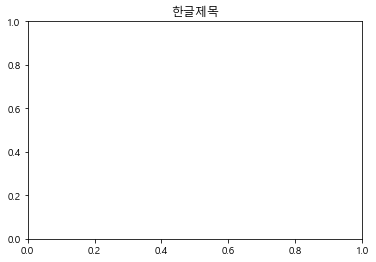

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('한글제목')
plt.show()

In [ ]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

In [ ]:
# def codefind(name):
#     krx = fdr.StockListing('KRX')
#     search = list(krx['Name'])
#     for i in range(len(krx)):
#         if (search[i]==name):
#             print(krx['Symbol'][i])
#             return
# codefind('카카오')        

In [ ]:
def my_ticker(names):    
    df_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
    df_code.종목코드 = df_code.종목코드.map('{:06d}'.format)

    df_code = df_code[['회사명', '종목코드']]
    code_list = []
    for name in names:
        code = df_code.query("회사명=='{}'".format(name))['종목코드'].to_string(index=False)
        code_list.append(code)
    return code_list

# stocks = my_ticker(['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER'])
# print(stocks)

In [ ]:
# def logger(func):
#     @wraps(func)
#     def wrapper(*args, **kwargs):
#         start = time.perf_counter()
#         success, failed = func(*args, **kwargs)
#         end = time.perf_counter() - start
#         func_start, func_end = args[0], args[1]
#         print(#f'#date: {func_start} ~ {func_end}, \n',
#               f'#success: {success} item(s), \n',
#               f'#failed: {failed} item(s), \n',
#              )
#     return wrapper
# @logger
def my_krx(start, end, *codes):
    error_list = []
    failed = 0
    success = 0
    df = pd.DataFrame()
    for code in codes:
        try: 
            df = stock.get_market_ohlcv_by_date(start, end, code)
            df.reset_index(inplace=True)
            df.insert(loc=1, column='종목코드', value=code)
            df.columns = ['date', 'code', 'open', 'high', 'low', 'close','volume']
            success += 1
        except ElementTree.ParseError as e:
            error_list.append(e)
            drop_rows(database, table, code)  # 특정 종목코드에서 에러 발생 시 해당 종목코드에 대한 데이터 삭제 후 다음 종목코드로 넘어감
            failed += 1
            continue
        except Exception as e:
            print('Error occurred : ', e)
            failed += 1
            continue
    print(f'success:{success}, failed:{failed}')
    return df
my_krx('20180101', '20191231', '005930')

success:1, failed:0


,date,code,open,high,low,close,volume
0,2018-01-02,005930,51380,51400,50780,51020,169485
1,2018-01-03,005930,52540,52560,51420,51620,200270
2,2018-01-04,005930,52120,52180,50640,51080,233909
3,2018-01-05,005930,51300,52120,51200,52120,189623
4,2018-01-08,005930,52400,52520,51500,52020,167673
...,...,...,...,...,...,...,...
485,2019-12-23,005930,56100,56400,55100,55500,9839252
486,2019-12-24,005930,55600,55700,54800,55000,11868463
487,2019-12-26,005930,54700,55400,54400,55400,9645034
488,2019-12-27,005930,55700,56900,55500,56500,12313056


In [ ]:
# yahoo finance
# df_ss = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')

In [ ]:
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
stocks_code = my_ticker(stocks)
print(stocks_code)  #['005930', '000660', '005380', '035420']

df = pd.DataFrame()
for i, sname in enumerate(stocks):
#     print(sname, stocks_code[i])    
    df[sname] = my_krx('20180101', '20191231', stocks_code[i])['close']
df.head()

['005930', '000660', '005380', '035420']
success:1, failed:0
success:1, failed:0
success:1, failed:0
success:1, failed:0


,삼성전자,SK하이닉스,현대자동차,NAVER
0,51020,76600,149500,177251
1,51620,77700,150500,174447
2,51080,77100,146500,178853
3,52120,79300,149000,181857
4,52020,78200,151000,190269
